<a href="https://colab.research.google.com/github/nishanth0233/INFO-5502/blob/main/lab_assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The sixth Lab-assignment (03/24/2022, 50 points in total)

The purpose of this exercise is to build a simple predicition model which can helpyou understand the workflow of machine learning. 

### Task Decription 

The goal of this assignment is to predict bike share use, given the hour, day, and information about the weather. Companies like Divvy try to predict how much demand there will be for bikes on any given day to allocate resources to redistribute bikes so that, ideally, very few bike stations are ever full (when you can’t park your bike) or empty (when you can’t pick up a bike if you want to).

The data (link: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/lab_assignment_06) in Github provides detailed information on the data set and necessary downloads.

### Data Description

You are provided hourly rental data spanning two years (link: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/lab_assignment_06). For this task, the training set is comprised of the first 16 days of each month, while the test set is the 17-19th day of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period. That is, predict "count" without using "count" or its components "casual" and "registered".

Data Fields

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1 - Clear, Few clouds, Partly cloudy, Partly cloudy

2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

### Output

Submission Format

Your output (a separate file) must have a header line and should be structured in the following format:

 datetime,count
 
 2011-01-20 00:00:00,0 
 
 2011-01-20 01:00:00,0
 
 2011-01-20 02:00:00,0
 
 ...
 
The tutorial code should demonstrate how to generate such a file from a very simple prediction model. Note, these prediction are to be done on the test file under the data tab, where you do not know the actual count, and should match the rows of the test file in count and order.

Your predictions should be compared to the ground truth information (sample_prediction.csv). Score are calculated using Root Mean Squared Error (RMSE).

### Tips

●	Add features: Pick columns/features from the data you already have. Or make a new feature from the ones you have. For example, the tutorial makes ‘hour’ from the datetime stamp, which seemed very useful. How about ‘month’?

●	Model selection: Try different models. Make sure they are regression models rather than classification models. Tip: random forest regression is a good, all around modeling strategy on complicated data sets.

●	Model tuning: Almost all regression models have parameters to tune (“hyperparameters”). E.g. polynomial regression has the degree of the polynomial (n = 1 for a line, n=2 for a quadratic fit, n=3 for a cubic fit…). Generally, one extreme makes the model too simple (e.g. a line for a curved set of points) and the other extreme makes the model overfit/be too complex, and usually the right choice is in between. For some models it is obvious what to tune (e.g. k for k nearest neighbors regression) and some don’t need much tuning with defaults that often work well. e.g. try changing the number of trees used in the random forest model!

●	Cross validation: The tutorial has a simple way of separating training and test data, however, there are better ways of splitting training and test data. Look into cross validation techniques, which are more reliable than an arbitrary split of training and test data.

●	Separate models for ...: Notice that count comes from just adding casual riders and registered riders. However, what if these two types of riders acted very differently? It might make sense to make two separate models and just add the results of both models together. This is also true for any subsets of your data that may behave wildly differently (e.g. create a separate model for each season?)

### Your code

In [51]:
### You code here:


#install pyforest library
!pip install pyforest

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import pyforest
import math

#defining trained data from source
trained = pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/train_luc.csv')
#defining test data from source
test = pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/test_luc.csv')

#trained data null values
trained.isnull().sum()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [54]:
#test data null values
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [55]:
#trained data duplicate values
trained.duplicated().unique()

array([False])

In [56]:
#test data duplicate values
test.duplicated().unique()

array([False])

In [57]:
# trained data description
trained.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000
mean,2.505559,0.031284,0.678875,1.414868,20.130401,23.578433,61.715064,12.737931,35.713647,154.868106,190.581753
std,1.116618,0.174094,0.466934,0.635363,7.940504,8.617957,19.401829,8.199027,49.667738,150.981155,181.011530
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500,4.000000,35.000000,41.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,61.000000,11.001400,16.000000,117.000000,144.000000
75%,4.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,222.000000,282.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,362.000000,886.000000,977.000000


In [58]:
# test data description
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000
mean,2.512266,0.014019,0.691589,1.437500,20.769182,24.065832,62.804907,13.128763
std,1.114104,0.117602,0.461972,0.625445,6.916677,7.650085,18.360263,7.971457
min,1.000000,0.000000,0.000000,1.000000,4.920000,6.060000,8.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,15.580000,19.695000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,64.000000,12.998000
75%,4.000000,0.000000,1.000000,2.000000,25.420000,30.305000,77.000000,16.997900
max,4.000000,1.000000,1.000000,3.000000,38.540000,43.940000,100.000000,50.002100


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'HeatMap for trained data')

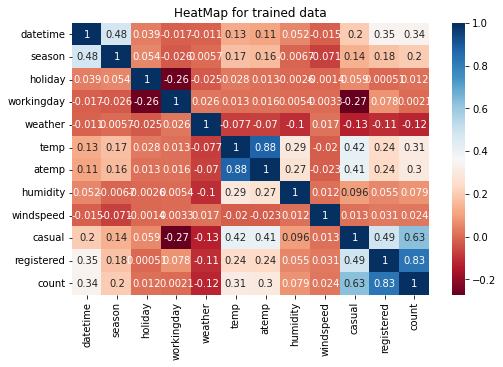

In [59]:
import seaborn as sns
from importlib import reload
df = trained.apply(lambda x:x.factorize()[0]).corr()
plt.figure(figsize=(8,5))
sns.heatmap(df, annot = True, cmap="RdBu")
plt.title("HeatMap for trained data")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'HeatMap for trained data')

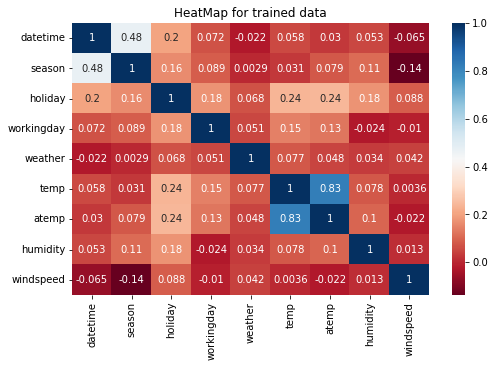

In [60]:
df = test.apply(lambda x:x.factorize()[0]).corr()
plt.figure(figsize=(8,5))
sns.heatmap(df, annot = True, cmap="RdBu")
plt.title("HeatMap for trained data")

In [61]:
#import datetime to generate time table
from datetime import datetime
#using lambda to map trained data
trained['hour']=trained['datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').time().hour)
#print(trained)
trained

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9169,2012-12-16 19:00:00,4,0,0,1,14.76,17.425,93,8.9981,10,99,109,19
9170,2012-12-16 20:00:00,4,0,0,2,15.58,19.695,82,0.0000,14,108,122,20
9171,2012-12-16 21:00:00,4,0,0,2,14.76,18.940,93,0.0000,14,92,106,21
9172,2012-12-16 22:00:00,4,0,0,2,16.40,20.455,82,12.9980,6,83,89,22


In [62]:
#using lambda to map test data
test['hour']=test['datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').time().hour)
#print(test)
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,2011-01-17 00:00:00,1,1,0,2,8.20,9.850,47,15.0013,0
1,2011-01-17 01:00:00,1,1,0,2,8.20,9.850,44,12.9980,1
2,2011-01-17 02:00:00,1,1,0,2,7.38,8.335,43,16.9979,2
3,2011-01-17 03:00:00,1,1,0,2,7.38,9.090,43,12.9980,3
4,2011-01-17 04:00:00,1,1,0,2,7.38,9.850,43,8.9981,4
...,...,...,...,...,...,...,...,...,...,...
1707,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,19
1708,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,20
1709,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,21
1710,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,22


In [63]:
#splitting and assigning every Independtent variable to a
a=trained.iloc[:,[1,2,3,4,5,6,7,8,12]]
a

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,1,0,0,1,9.84,14.395,81,0.0000,0
1,1,0,0,1,9.02,13.635,80,0.0000,1
2,1,0,0,1,9.02,13.635,80,0.0000,2
3,1,0,0,1,9.84,14.395,75,0.0000,3
4,1,0,0,1,9.84,14.395,75,0.0000,4
...,...,...,...,...,...,...,...,...,...
9169,4,0,0,1,14.76,17.425,93,8.9981,19
9170,4,0,0,2,15.58,19.695,82,0.0000,20
9171,4,0,0,2,14.76,18.940,93,0.0000,21
9172,4,0,0,2,16.40,20.455,82,12.9980,22


In [64]:
#further splitting and assigning variables to b
b=trained.iloc[:,9]
b

0        3
1        8
2        5
3        3
4        0
        ..
9169    10
9170    14
9171    14
9172     6
9173     4
Name: casual, Length: 9174, dtype: int64

In [65]:
#Building model by further spliting in a 80:20 ratio
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=20)

#generating first model using depth 10 and randomforestregressor
model1 = RandomForestRegressor(random_state=20,max_depth = 10, oob_score = True)

#cross validation score generation using sklearn
from sklearn.model_selection import cross_val_score
Val_score = cross_val_score(model1, a_train, b_train, cv = 4)
print(Val_score)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.85164394 0.83849514 0.86313957 0.83801568]


In [66]:
#fitting the data
model1.fit(a_train,b_train)

RandomForestRegressor(max_depth=10, oob_score=True, random_state=20)

In [67]:
#assigning the prediction values 
predict1 = model1.predict(a_test)
predict1

array([ 0.9005042 ,  8.66260072, 53.88027497, ..., 29.12182572,
       26.04037186, 72.49517922])

In [68]:
# model1 score
model1.score(a_test,b_test)

0.8432228223862773

In [69]:
#calculating mean squared error
mse = mean_squared_error(predict1,b_test)
rmse = math.sqrt(mse)
rmse

19.1238068806988

In [70]:
#creating a 2nd model under linear regression
model2 = LinearRegression()
#Validation score
Val_score = cross_val_score(model2, a_train, b_train, cv = 4)
print(Val_score)

<IPython.core.display.Javascript object>

[0.48356219 0.48996724 0.49706208 0.4687075 ]


In [71]:
#fitting the data
model2.fit(a_train,b_train)

LinearRegression()

In [72]:
#assigning the prediction values 
predict2 = model2.predict(a_test)
predict2

array([-14.38587916,  13.97850711,  74.95968019, ...,  53.55108511,
        35.41765216,  51.22802752])

In [73]:
# model2 score
model2.score(a_test,b_test)

0.4401874507849407

In [74]:
#calculating mean squared error
mse = mean_squared_error(predict2,b_test)
rmse = math.sqrt(mse)
rmse

36.137178702217135

In [75]:
#creating a 3rd model under Decision tree regressor
model3 = DecisionTreeRegressor()
#Validation score
Val_score = cross_val_score(model3, a_train, b_train, cv = 4)
print(Val_score)

[0.73302265 0.74812843 0.7239182  0.74127371]


In [76]:
#fitting the data
model3.fit(a_train,b_train)

DecisionTreeRegressor()

In [77]:
#assigning the prediction values 
predict3 = model3.predict(a_test)
predict3

array([  0.,  11., 117., ...,  58.,  44.,  56.])

In [78]:
# model3 score
model3.score(a_test,b_test)

0.7385161444423642

In [80]:
#calculating mean squared error
mse = mean_squared_error(predict3,b_test)
rmse = math.sqrt(mse)
rmse

24.697635026469566

RandomForestRegressor and Decision Tree regressor are ideal if we observe the rmse values

In [82]:
model1.fit(trained.iloc[:,[1,2,3,4,5,6,7,8,12]],trained.iloc[:,9])
finalpredict = model1.predict(test.iloc[:,1:10])
finalpredict

array([ 2.6716595 ,  2.62020951,  2.72608035, ..., 10.6848934 ,
       13.29561919, 10.56037603])

In [83]:
test['casual']=np.round(finalpredict,1)
test['casual']

<IPython.core.display.Javascript object>

0        2.7
1        2.6
2        2.7
3        1.3
4        1.0
        ... 
1707    27.7
1708    15.8
1709    10.7
1710    13.3
1711    10.6
Name: casual, Length: 1712, dtype: float64

In [84]:
model3.fit(trained.iloc[:,[1,2,3,4,5,6,7,8,12]], trained.iloc[:,10])
finalpredict2 = model3.predict(test.iloc[:,1:10])
finalpredict2

array([ 40.,  40.,  11., ..., 193., 175.,  48.])

In [85]:
test['registered']=np.round(finalpredict2,1)
test['registered']

<IPython.core.display.Javascript object>

0        40.0
1        40.0
2        11.0
3        24.0
4         3.0
        ...  
1707    212.0
1708    207.0
1709    193.0
1710    175.0
1711     48.0
Name: registered, Length: 1712, dtype: float64

In [87]:
test['count']=test['casual']+test['registered']
test['count']

0        42.7
1        42.6
2        13.7
3        25.3
4         4.0
        ...  
1707    239.7
1708    222.8
1709    203.7
1710    188.3
1711     58.6
Name: count, Length: 1712, dtype: float64

In [88]:
test[['datetime','count']].to_csv('Finalpredictions.csv',header=['datetime','count'],index = False) 
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,casual,registered,count
0,2011-01-17 00:00:00,1,1,0,2,8.20,9.850,47,15.0013,0,2.7,40.0,42.7
1,2011-01-17 01:00:00,1,1,0,2,8.20,9.850,44,12.9980,1,2.6,40.0,42.6
2,2011-01-17 02:00:00,1,1,0,2,7.38,8.335,43,16.9979,2,2.7,11.0,13.7
3,2011-01-17 03:00:00,1,1,0,2,7.38,9.090,43,12.9980,3,1.3,24.0,25.3
4,2011-01-17 04:00:00,1,1,0,2,7.38,9.850,43,8.9981,4,1.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,19,27.7,212.0,239.7
1708,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,20,15.8,207.0,222.8
1709,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,21,10.7,193.0,203.7
1710,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,22,13.3,175.0,188.3


New CSV file has been saved with all the predictions as 'FInalpredictions.csv'

In [91]:
Final = pd.read_csv('/content/Finalpredictions.csv')
print(Final)

<IPython.core.display.Javascript object>

                 datetime  count
0     2011-01-17 00:00:00   42.7
1     2011-01-17 01:00:00   42.6
2     2011-01-17 02:00:00   13.7
3     2011-01-17 03:00:00   25.3
4     2011-01-17 04:00:00    4.0
...                   ...    ...
1707  2012-12-19 19:00:00  239.7
1708  2012-12-19 20:00:00  222.8
1709  2012-12-19 21:00:00  203.7
1710  2012-12-19 22:00:00  188.3
1711  2012-12-19 23:00:00   58.6

[1712 rows x 2 columns]
